In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import random

In [2]:
def record_pixel(a,pixel, label, imagenames):
    Images = os.listdir(a)
    for img in Images:
        im = Image.open(a+img)
        im_array=np.asarray(im).flatten().tolist()
        pixel.append(im_array)
        label.append(a.replace('/',''))
        imagenames.append(a+img)
    return [pixel, label, imagenames]

In [3]:
pixel, label, imagenames=[], [], []
[pixel, label, imagenames]=record_pixel("Smile_Yes/",pixel, label, imagenames)
[pixel, label, imagenames]=record_pixel("Smile_No/",pixel, label, imagenames)

In [4]:
colnames=[]
for i in range(len(pixel[0])):
    colnames.append('Pixel'+'_'+str(i+1))

In [5]:
df = pd.DataFrame(pixel, columns=colnames)
df = df.div(255)
df["ImageNames"] = imagenames
df["Label"] = label

In [6]:
df.head()

,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,Pixel_10,...,Pixel_31259,Pixel_31260,Pixel_31261,Pixel_31262,Pixel_31263,Pixel_31264,Pixel_31265,Pixel_31266,ImageNames,Label
0,0.929412,0.921569,0.929412,0.913725,0.937255,0.941176,0.941176,0.941176,0.937255,0.929412,...,0.223529,0.231373,0.231373,0.223529,0.247059,0.258824,0.231373,0.239216,Smile_Yes/194b.jpg,Smile_Yes
1,0.733333,0.796078,0.847059,0.874510,0.898039,0.890196,0.913725,0.913725,0.925490,0.937255,...,0.054902,0.043137,0.019608,0.011765,0.007843,0.007843,0.007843,0.007843,Smile_Yes/100b.jpg,Smile_Yes
2,0.968627,0.968627,0.937255,0.917647,0.890196,0.850980,0.803922,0.780392,0.780392,0.780392,...,0.329412,0.352941,0.400000,0.352941,0.329412,0.329412,0.341176,0.474510,Smile_Yes/193b.jpg,Smile_Yes
3,0.027451,0.027451,0.027451,0.023529,0.039216,0.039216,0.035294,0.047059,0.047059,0.043137,...,0.235294,0.270588,0.305882,0.368627,0.427451,0.427451,0.427451,0.443137,Smile_Yes/57b.jpg,Smile_Yes
4,0.929412,0.909804,0.929412,0.909804,0.917647,0.898039,0.929412,0.929412,0.909804,0.917647,...,0.333333,0.349020,0.380392,0.364706,0.364706,0.380392,0.380392,0.396078,Smile_Yes/110b.jpg,Smile_Yes


In [7]:
X=df[colnames]
X

,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,Pixel_10,...,Pixel_31257,Pixel_31258,Pixel_31259,Pixel_31260,Pixel_31261,Pixel_31262,Pixel_31263,Pixel_31264,Pixel_31265,Pixel_31266
0,0.929412,0.921569,0.929412,0.913725,0.937255,0.941176,0.941176,0.941176,0.937255,0.929412,...,0.200000,0.207843,0.223529,0.231373,0.231373,0.223529,0.247059,0.258824,0.231373,0.239216
1,0.733333,0.796078,0.847059,0.874510,0.898039,0.890196,0.913725,0.913725,0.925490,0.937255,...,0.078431,0.078431,0.054902,0.043137,0.019608,0.011765,0.007843,0.007843,0.007843,0.007843
2,0.968627,0.968627,0.937255,0.917647,0.890196,0.850980,0.803922,0.780392,0.780392,0.780392,...,0.274510,0.262745,0.329412,0.352941,0.400000,0.352941,0.329412,0.329412,0.341176,0.474510
3,0.027451,0.027451,0.027451,0.023529,0.039216,0.039216,0.035294,0.047059,0.047059,0.043137,...,0.152941,0.184314,0.235294,0.270588,0.305882,0.368627,0.427451,0.427451,0.427451,0.443137
4,0.929412,0.909804,0.929412,0.909804,0.917647,0.898039,0.929412,0.929412,0.909804,0.917647,...,0.321569,0.321569,0.333333,0.349020,0.380392,0.364706,0.364706,0.380392,0.380392,0.396078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.937255,0.937255,0.937255,0.945098,0.941176,0.937255,0.917647,0.874510,0.858824,0.847059,...,0.015686,0.019608,0.031373,0.031373,0.027451,0.015686,0.015686,0.015686,0.015686,0.023529
396,0.698039,0.698039,0.725490,0.752941,0.745098,0.745098,0.698039,0.611765,0.600000,0.572549,...,0.337255,0.309804,0.321569,0.364706,0.364706,0.380392,0.407843,0.392157,0.415686,0.392157
397,0.207843,0.109804,0.058824,0.047059,0.050980,0.043137,0.035294,0.031373,0.039216,0.035294,...,0.211765,0.211765,0.160784,0.152941,0.160784,0.203922,0.278431,0.278431,0.290196,0.368627
398,0.984314,0.984314,0.984314,0.976471,0.992157,0.992157,0.996078,0.992157,0.996078,0.996078,...,0.160784,0.152941,0.168627,0.180392,0.188235,0.188235,0.180392,0.211765,0.270588,0.305882


In [8]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=50)
dim_reduc = pca.fit_transform(X)

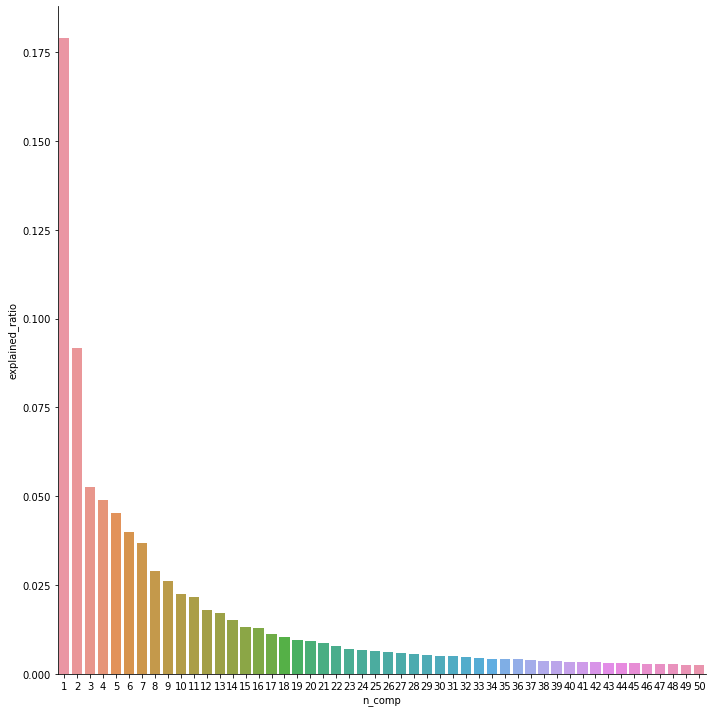

In [9]:
dr = pd.DataFrame({"explained_ratio":pca.explained_variance_ratio_, "n_comp":range(1,51)})
sns.catplot(data=dr, x="n_comp", y="explained_ratio", kind="bar", height=10)

In [10]:
pca_sns = pd.DataFrame(dim_reduc, columns=["PC_"+str(i) for i in range(1, 51)])
pca_sns["Label"] = label
pca_sns["ImageNames"] = imagenames
pca_sns

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50,Label,ImageNames
0,6.510447,7.347088,-12.725596,8.704272,-6.540663,-1.304514,-0.854152,-6.583924,-3.245468,1.041438,...,0.673182,0.071329,1.617155,0.179677,-0.296760,0.133649,0.444585,0.254106,Smile_Yes,Smile_Yes/194b.jpg
1,22.535982,0.509015,3.946339,10.904526,1.018633,-2.881535,12.621492,2.928703,0.832660,12.245009,...,2.304112,-0.460471,-2.774613,1.432595,-1.459685,1.037721,-0.327143,0.627738,Smile_Yes,Smile_Yes/100b.jpg
2,10.991414,-4.825259,-9.072892,-6.000480,-0.366205,4.851724,-8.246651,-0.649789,-4.263013,7.309711,...,-3.248894,2.074717,-2.159253,4.269358,-3.075417,-3.082556,1.166484,0.956487,Smile_Yes,Smile_Yes/193b.jpg
3,12.758166,-15.978350,-1.184247,-2.231994,-3.884655,-0.753060,-10.650435,3.559392,-3.970702,5.541638,...,-4.095866,0.160250,1.675753,-2.865321,-0.579886,2.933412,-0.573945,0.777629,Smile_Yes,Smile_Yes/57b.jpg
4,5.404071,2.907938,-14.630752,-0.609206,-10.203695,-3.081794,-4.180550,-1.894646,2.845761,-3.711498,...,1.947377,-0.312775,-0.949776,-0.310269,-0.220781,0.463172,0.691268,-3.136107,Smile_Yes,Smile_Yes/110b.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,13.194332,17.017176,3.990846,-4.196959,-1.297560,-6.803282,-4.434613,-5.821449,-1.857844,-4.895584,...,-1.623224,-0.201877,2.090713,-0.842392,1.749359,0.355201,1.916833,0.230351,Smile_No,Smile_No/160a.jpg
396,-18.847421,-10.752669,-8.396331,4.731381,11.921907,-4.789038,-4.958839,-8.310168,-1.855898,-2.072948,...,-1.598543,-0.537740,-4.517976,-1.983951,-1.972918,-0.199350,-1.296305,0.040842,Smile_No,Smile_No/190a.jpg
397,-20.592076,3.638483,4.546858,-4.268828,12.862302,3.044982,-3.708624,6.437054,-6.946523,6.005985,...,0.700789,-0.379550,0.558916,1.246855,0.258065,0.115460,-0.095058,-0.628176,Smile_No,Smile_No/59a.jpg
398,-11.771231,-0.955027,-1.699869,15.962127,-9.038514,-0.720408,14.016135,-2.677255,2.396035,2.218287,...,-2.360169,-0.419405,-1.011315,-1.083446,1.237467,0.263818,-0.626039,-0.463731,Smile_No,Smile_No/45a.jpg


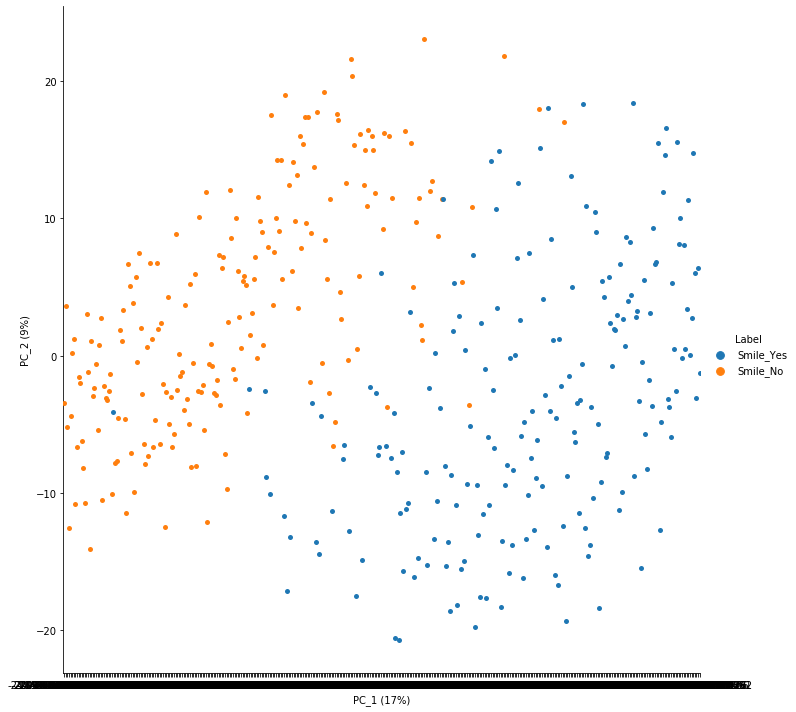

In [11]:
g = sns.catplot(data=pca_sns, x="PC_1", y="PC_2", hue='Label', height=10)
g.set(xlabel='PC_1 (17%)', ylabel='PC_2 (9%)')

In [12]:
from sklearn.manifold import TSNE


dim_reduc = TSNE(n_components=2, random_state=64).fit_transform(pca_sns[["PC_"+str(i) for i in range(1,3)]])

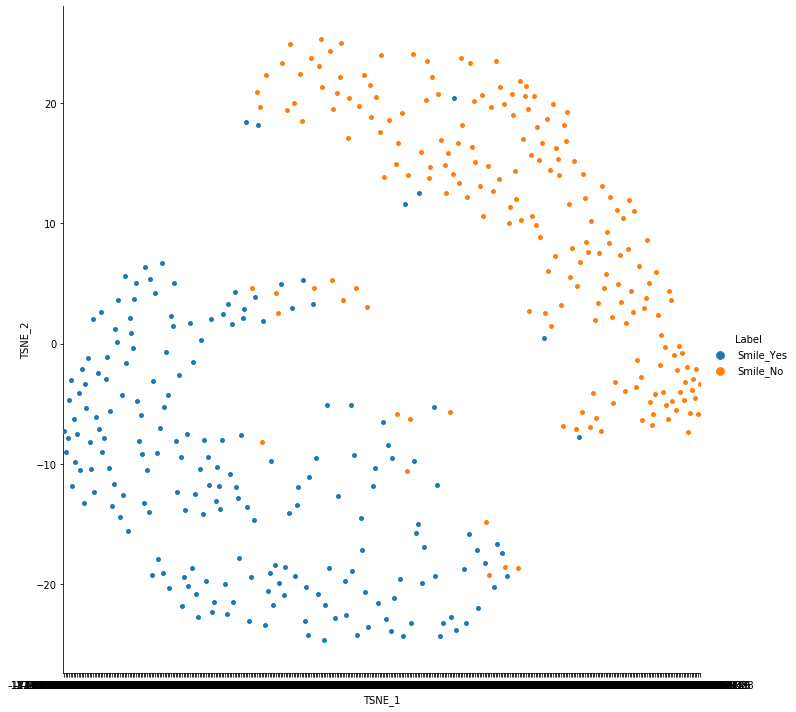

In [13]:
tsne_sns = pd.DataFrame(dim_reduc, columns=["TSNE_"+str(i) for i in range(1, 3)])
tsne_sns["Label"] = label
tsne_sns["ImageNames"] = imagenames

sns.catplot(data=tsne_sns, x="TSNE_1", y="TSNE_2", hue='Label', height=10)

In [14]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
output_notebook()

Loading BokehJS ...

In [15]:
def c(x):
    if x == "Smile_Yes": 
        return "red"
    return "blue"

tsne_sns["color"] = tsne_sns["Label"].apply(c)
ts = ColumnDataSource(tsne_sns)

p = figure(tools=[HoverTool(tooltips=[    ('ImageName', '@ImageNames')    ])])

p.scatter(x="TSNE_1", y="TSNE_2", color="color", legend="Label", source=ts)

show(p)

In [16]:
import sklearn.metrics as m
m.silhouette_score(tsne_sns[["TSNE_1", "TSNE_2"]], tsne_sns["Label"], metric="sqeuclidean")

0.604165122733335

In [17]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [18]:
model=KMeans()

In [19]:
viz=KElbowVisualizer(model,k=(1,20))
viz.fit(pca_sns)
viz.poof()

ValueError: could not convert string to float: 'Smile_No/169a.jpg'